## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_datareader import data as pdr
import yfinance as yf
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import requests
import datetime
#from datetime import datetime
import time

### Import data from csv (remember to set the correct path or the name of the file inside the same folder of this ipynb file)

In [6]:
open_df = pd.read_csv('open_2020-02-29_2021-02-28_4640', index_col='date')
high_df = pd.read_csv('high_2020-02-29_2021-02-28_4640', index_col='date')
low_df = pd.read_csv('low_2020-02-29_2021-02-28_4640', index_col='date')
adjclose_df = pd.read_csv('adjclose_2020-02-29_2021-02-28_4640', index_col='date')

In [7]:
open_df.describe()

,A,AA,AACG,AAIC,AAL,AAMC,AAME,AAOI,AAON,AAP,...,ZS,ZSAN,ZTO,ZTS,ZUMZ,ZUO,ZVO,ZYME,ZYNE,ZYXI
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,...,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,98.555378,14.199482,1.403088,3.092669,13.732171,19.222854,2.235578,10.048104,59.017769,143.522749,...,130.706810,0.917450,31.474920,148.402908,29.454980,11.771235,3.700127,39.542390,4.081371,16.730757
std,17.524759,5.514781,1.227754,0.682540,2.689546,3.860790,0.781632,2.035424,8.681810,20.139047,...,50.663821,0.409255,3.758926,17.309910,8.312772,2.097403,1.388426,7.338844,0.837030,3.998492
min,63.410000,5.500000,0.690000,1.870000,8.770000,10.720000,1.580000,5.510000,41.500000,74.970001,...,37.000000,0.338000,23.490000,98.709999,13.130000,6.670000,1.110000,24.299999,2.850000,8.000000
25%,86.494999,10.845000,0.960000,2.705000,11.820000,16.000000,1.890000,8.480000,53.575001,136.500000,...,91.940002,0.629000,28.740000,135.400002,23.925000,10.305000,2.685000,34.549999,3.540000,13.715000
50%,98.089996,12.960000,1.140000,2.850000,13.070000,20.270000,2.070000,10.010000,58.029999,150.570007,...,132.229996,0.830000,30.920000,157.580002,27.629999,11.670000,4.000000,38.330002,3.800000,16.219999
75%,113.829998,18.790000,1.240000,3.590000,15.720000,22.495000,2.235000,11.285000,63.969999,156.584999,...,154.305000,1.039500,34.590000,161.959999,35.905001,12.920000,4.565000,43.634998,4.215000,19.240000
max,132.800003,27.480000,10.020000,6.100000,22.129999,28.049999,6.270000,17.309999,81.000000,176.020004,...,230.880997,2.780000,38.830002,175.460007,48.270000,16.879999,6.910000,57.310001,8.010000,28.650000


In [4]:
stock_df.index = pd.to_datetime(stock_df.index)

In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-23 to 2021-01-22
Columns: 4638 entries, A to ZYXI
dtypes: float64(4638)
memory usage: 9.0 MB


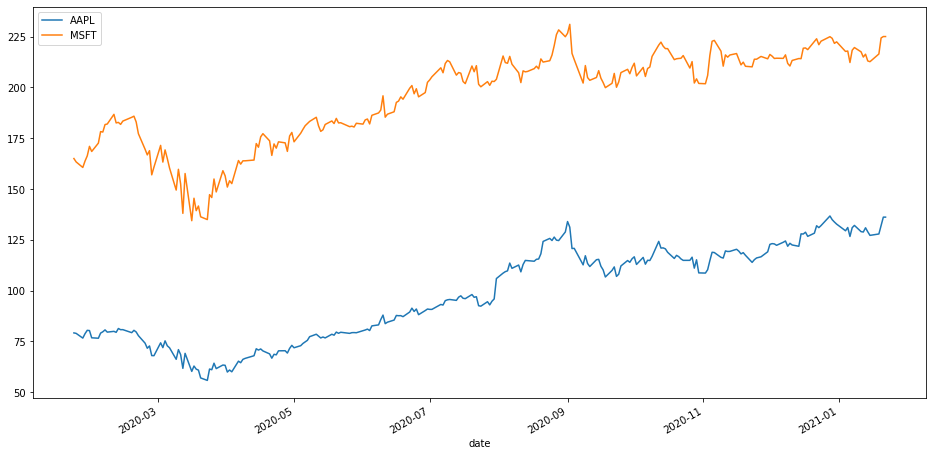

In [6]:
stock_df[['AAPL', 'MSFT']].plot(figsize=(16,8))

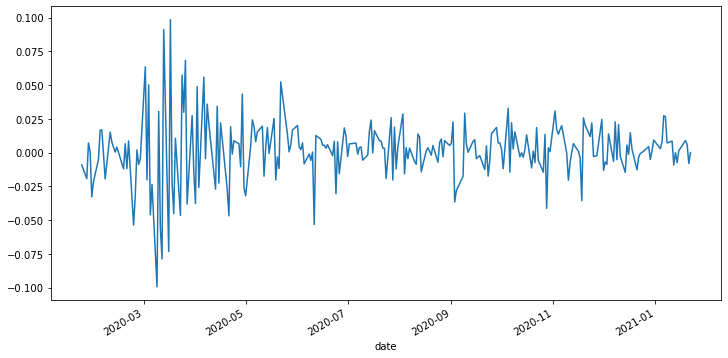

In [7]:
#A = df[['A']]
A = pd.DataFrame(stock_df.loc[:,'A'])
A['Percent Change'] = stock_df['A'].pct_change()
A['Percent Change'].plot(figsize=(12,6))

In [8]:
stock_return = A['Percent Change'].sum() * 100
stock_return

43.10751034890649

In [9]:
index_name = '^GSPC' # S&P 500

In [10]:
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()

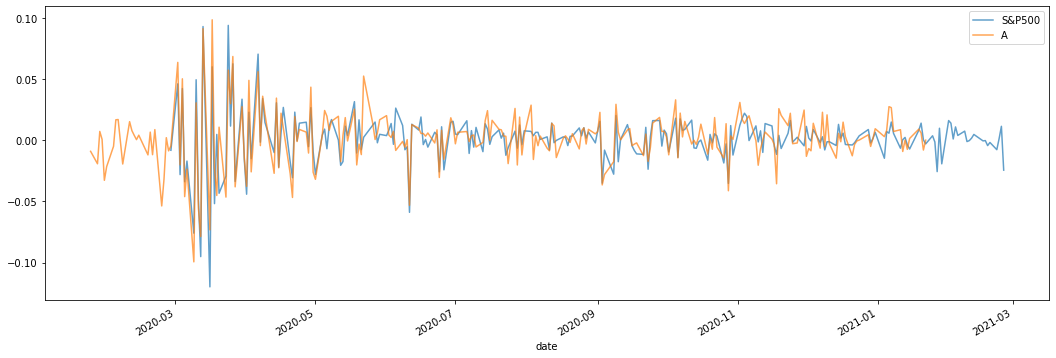

In [11]:
index_df = pdr.get_data_yahoo(index_name, start=start_date, end=end_date)
index_df['Percent Change'] = index_df['Adj Close'].pct_change()
index_return = index_df['Percent Change'].sum() * 100

index_df['Percent Change'].plot(label='S&P500', figsize=(18,6), alpha=0.7)
A['Percent Change'].plot(label='A', alpha=0.7)
plt.legend()

In [12]:
final = []
index = []
n = -1

In [13]:
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])

In [14]:
#stocklist = stock_df.iloc[:,0:30].columns.to_list()
stocklist = stock_df.columns.to_list()
len(stocklist)

4638

In [15]:
start_time = datetime.datetime.now().strftime("%H:%M:%S")

for stock in stocklist:
    
    n += 1
    #time.sleep(1)
    
    #print ("\npulling {} with index {}".format(stock, n))
    
    df = pd.DataFrame(stock_df[stock])
    df.columns = ['Adj Close']
    
    df['Percent Change'] = df['Adj Close'].pct_change()    
    stock_return = df['Percent Change'].sum() * 100
   
    RS_Rating = round((stock_return / index_return) * 10, 2)
#    print(stock, stock_return, index_return, RS_Rating)
    
    try:
        sma = [50, 150, 200]
        for x in sma:
            df["SMA_"+str(x)] = round(df.iloc[:,0].rolling(window=x).mean(), 2)
#        print(df)

        currentClose = df["Adj Close"][-1]
#        print('Current close: ', currentClose)
        moving_average_50 = df["SMA_50"][-1]
#        print('50d MA: ', moving_average_50)
        moving_average_150 = df["SMA_150"][-1]
#        print('150d MA: ', moving_average_150)
        moving_average_200 = df["SMA_200"][-1]
#        print('200d MA: ', moving_average_200)
        low_of_52week = min(df["Adj Close"][-260:])
#        print('Low last 52w: ', low_of_52week)
        high_of_52week = max(df["Adj Close"][-260:])
#        print('High last 52w: ', high_of_52week)
        
        try:
            moving_average_200_20 = df["SMA_200"][-20]
#            print(moving_average_200_20)

        except Exception:
            moving_average_200_20 = 0
#
        # Condition 1: Current Price > 150 SMA and > 200 SMA
        if(currentClose > moving_average_150 > moving_average_200):
            #print("Condition 1 met")
            condition_1 = True
        else:
            #print("Condition 1 not met")
            condition_1 = False
        # Condition 2: 150 SMA and > 200 SMA
        if(moving_average_150 > moving_average_200):
            #print("Condition 2 met")
            condition_2 = True
        else:
            #print("Condition 2 not met")
            condition_2 = False
        # Condition 3: 200 SMA trending up for at least 1 month (ideally 4-5 months)
        if(moving_average_200 > moving_average_200_20):
            #print("Condition 3 met")
            condition_3 = True
        else:
            #print("Condition 3 not met")
            condition_3 = False
        # Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
        if(moving_average_50 > moving_average_150 > moving_average_200):
            #print("Condition 4 met")
            condition_4 = True
        else:
            #print("Condition 4 not met")
            condition_4 = False
        # Condition 5: Current Price > 50 SMA
        if(currentClose > moving_average_50):
            #print("Condition 5 met")
            condition_5 = True
        else:
            #print("Condition 5 not met")
            condition_5 = False
        # Condition 6: Current Price is at least 30% above 52 week low (Many of the best are up 100-300% before coming out of consolidation)
        if(currentClose >= (1.3*low_of_52week)):
            #print("Condition 6 met")
            condition_6 = True
        else:
            #print("Condition 6 not met")
            condition_6 = False
        # Condition 7: Current Price is within 25% of 52 week high
        if(currentClose >= (.75*high_of_52week)):
            #print("Condition 7 met")
            condition_7 = True
        else:
            #print("Condition 7 not met")
            condition_7 = False
            
        # Condition 8: IBD RS_Rating greater than 70
        if(RS_Rating >= 99.99):
            #print("Condition 8 met")
            condition_8 = True
        else:
            #print("Condition 8 not met")
            condition_8 = False

        if(condition_1 and condition_2 and condition_3 and condition_4 and condition_5 and condition_6 and condition_7 and condition_8):
            final.append(stock)
            index.append(n)
            
            dataframe = pd.DataFrame(list(zip(final, index)), columns =['Company', 'Index'])
            
            dataframe.to_csv('stocks.csv')
            
            exportList = exportList.append({'Stock': stock, "RS_Rating": RS_Rating ,"50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True)
            #print (stock + " made the requirements")
        #else:
            #print(stock + " NOT made the requirements")
    except Exception as e:
        print (e)
        print("No data on "+stock)

print(exportList)

writer = ExcelWriter("ScreenOutput.xlsx")
exportList.to_excel(writer, "Sheet1")
writer.save()

end_time = datetime.datetime.now().strftime("%H:%M:%S")
print('inizio: ', start_time, ' fine: ', end_time)

   Stock  RS_Rating  50 Day MA  150 Day Ma  200 Day MA  52 Week Low  \
0   ACRS     124.57       5.88        3.74        3.13        0.750   
1   BLNK     136.86      33.01       16.38       12.75        1.310   
2   BNGO     116.63       2.34        1.18        0.99        0.260   
3   CBLI     134.29       3.29        2.67        2.44        1.090   
4   COGT     124.09      11.40       10.36        8.24        1.280   
5   CPSH     107.97       3.37        2.38        2.12        0.920   
6   CRIS     143.24       6.14        2.84        2.35        0.630   
7    ENG     101.81       2.96        1.62        1.47        0.510   
8   FCEL     104.39      10.14        5.05        4.31        1.090   
9    FIT   33643.49    1738.52      583.92      439.58        5.990   
10  FRSX     107.02       3.18        1.84        1.60        0.473   
11  FTEK     115.83       3.95        1.87        1.58        0.390   
12   FUV     105.91      13.62        8.67        7.08        0.966   
13  GE

In [16]:
lista = list(exportList.Stock)
lista.remove('FIT')

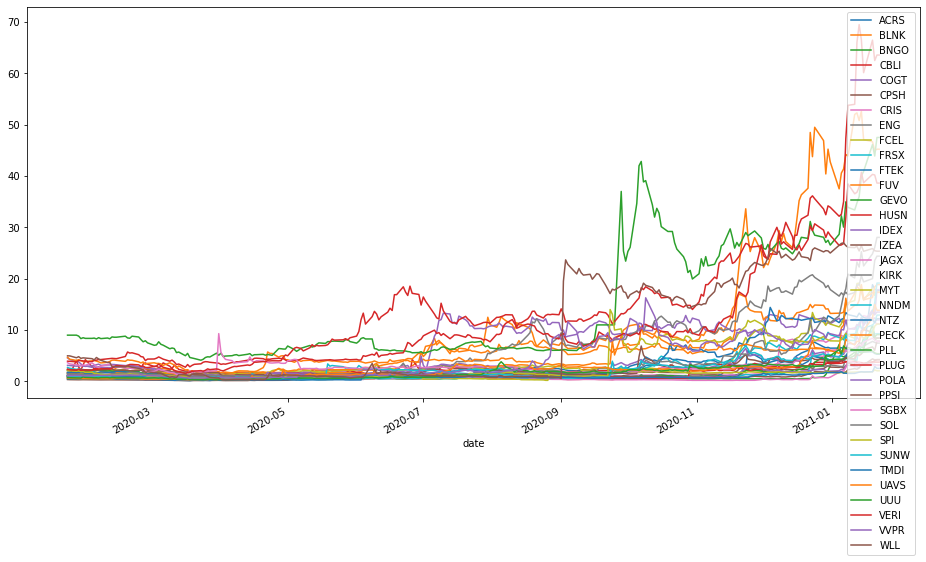

In [17]:
stock_df[lista].plot(figsize=(16,8))

In [ ]:
pd.DataFrame(df.iloc[:,0])

In [ ]:
stock_df[list(exportList['Stock'])]

In [ ]:
type(list(exportList['Stock']))

In [ ]:
exportList.loc[81]
#exportList.drop(exportList['FIT'], axis=0)
#tmp_exportList

In [ ]:
len(list(exportList['Stock']))

In [ ]:
screen_df = stock_df[tmp_exportList]

In [ ]:
stock_df[0:80].plot(figsize=(16,8))
#screen_df.plot(figsize=(16,8))
#plt

In [ ]:
list(exportList['Stock'])

In [ ]:
dataframe